In [4]:
import pandas as pd

df = pd.read_csv("creditcard.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# ডেটাসেটের তথ্য
print(df.info())       # কলাম, ডেটাটাইপ, null আছে কি না

# ডেটার স্ট্যাটিস্টিক্স
print(df.describe())   # গড়, median, std deviation ইত্যাদি

# Fraud vs Non-Fraud সংখ্যা
print(df['Class'].value_counts())

# Fraud vs Non-Fraud শতাংশে
print(df['Class'].value_counts(normalize=True) * 100)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<Axes: ylabel='count'>

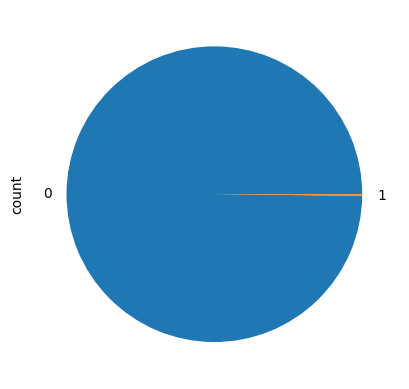

In [7]:
import matplotlib.pyplot as plt
count_class=df['Class'].value_counts()
count_class.plot(kind='pie')

In [12]:
#How to Handle This Imbalance
#Here are some common approaches:

#1. Resampling
#Oversample minority class (e.g., SMOTE):
# Step 1: Install imbalanced-learn
!pip install imbalanced-learn

from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
import pandas as pd

# Step 1: Create a sample imbalanced dataset
X, y = make_classification(
    n_classes=2,
    class_sep=2,
    weights=[0.1, 0.9],   # 10% vs 90%
    n_informative=3,
    n_redundant=1,
    flip_y=0,
    n_features=5,
    n_clusters_per_class=1,
    n_samples=200,
    random_state=42
)

# Step 2: Check original class distribution
print("Original class distribution:")
print(pd.Series(y).value_counts())

# Step 3: Apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Step 4: Check new class distribution
print("\nAfter SMOTE class distribution:")
print(pd.Series(y_res).value_counts())



Original class distribution:
1    180
0     20
Name: count, dtype: int64

After SMOTE class distribution:
1    180
0    180
Name: count, dtype: int64


In [14]:
# Step 1: Import libraries
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import pandas as pd

# Step 2: Load or create dataset (Example: synthetic data)
X, y = make_classification(
    n_samples=1000,    # total rows
    n_features=10,     # total columns
    n_informative=5,
    n_redundant=2,
    n_classes=2,
    weights=[0.9, 0.1], # imbalanced
    random_state=42
)

# Step 3: Split into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Step 5: Check new distribution
print("Before SMOTE:", pd.Series(y_train).value_counts())
print("After SMOTE:", pd.Series(y_res).value_counts())


Before SMOTE: 0    717
1     83
Name: count, dtype: int64
After SMOTE: 1    717
0    717
Name: count, dtype: int64


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)


In [16]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [17]:
y_pred = model.predict(X_test)


In [18]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))


[[139   5]
 [  2 141]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       144
           1       0.97      0.99      0.98       143

    accuracy                           0.98       287
   macro avg       0.98      0.98      0.98       287
weighted avg       0.98      0.98      0.98       287

ROC-AUC Score: 0.975645881895882
